In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('Amazon Sale Report copy.csv')
df

C:\Users\rohit\AppData\Local\Temp\ipykernel_20728\1516972811.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('Amazon Sale Report copy.csv')


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,INR,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


1.Data preprocessing

In [3]:
df.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

In [4]:
df=df.dropna()

In [5]:
df.duplicated().sum()

np.int64(0)

Revenue

In [6]:
# Total Revenue
total_revenue = df['Amount'].sum()
print(f"Total Revenue Generated: ₹{total_revenue:,.2f}")


Total Revenue Generated: ₹13,046,818.00


C:\Users\rohit\AppData\Local\Temp\ipykernel_20728\2870736894.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date']=pd.to_datetime(df['Date'],errors='coerce')
C:\Users\rohit\AppData\Local\Temp\ipykernel_20728\2870736894.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month']=df['Date'].dt.to_period('M')


     Month     Amount
0  2022-04    16615.0
1  2022-05  7415300.0
2  2022-06  5614903.0
<class 'pandas.core.frame.DataFrame'>


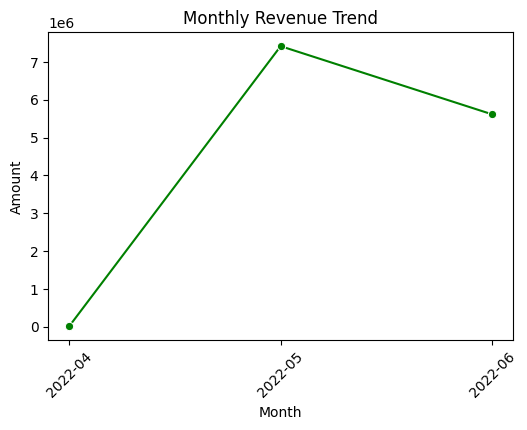

In [22]:
# Revenue by month
df['Date']=pd.to_datetime(df['Date'],errors='coerce')
df['Month']=df['Date'].dt.to_period('M')

monthly_revenue=df.groupby('Month')['Amount'].sum().reset_index()
monthly_revenue['Month'] = monthly_revenue['Month'].astype(str)
print(monthly_revenue)
print(type(monthly_revenue))

plt.figure(figsize=(6,4))
sns.lineplot(x='Month', y='Amount', data=monthly_revenue, marker='o',color='green')
plt.title("Monthly Revenue Trend")
plt.xticks(rotation=45)
plt.show()

Category
Set              5919897.0
Western Dress    3318232.0
kurta            2891562.0
Top               721354.0
Ethnic Dress      102085.0
Blouse             42488.0
Bottom             41541.0
Saree               9659.0
Name: Amount, dtype: float64


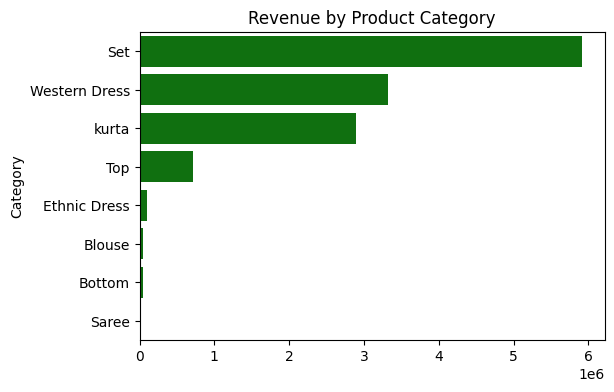

In [30]:
# Revenue by category
category_revenue=df.groupby('Category')['Amount'].sum().sort_values(ascending=False)
print(category_revenue)

plt.figure(figsize=(6,4))
sns.barplot(x=category_revenue.values, y=category_revenue.index,color='green')
plt.title("Revenue by Product Category")
plt.show()


2. Average order value

In [9]:
monthly_orders=df.groupby('Month')['Order ID'].nunique().reset_index()
print(monthly_orders)

     Month  Order ID
0  2022-04        27
1  2022-05     10209
2  2022-06      7757


In [10]:

total_orders=df['Order ID'].nunique()
print(total_orders) # number of orders


17993


In [11]:
average_order_value=total_revenue/total_orders
print(average_order_value)

725.1052075807258


3. Top selling products

In [12]:
top_products=df['SKU'].value_counts().head(5)
print(top_products)

SKU
JNE3797-KR-L      397
JNE3797-KR-M      369
JNE3797-KR-S      271
JNE3797-KR-XL     262
SET183-KR-DH-M    177
Name: count, dtype: int64


In [13]:
top_revenue_products=df.groupby('SKU')['Amount'].sum().sort_values(ascending=False).head(5)
print(top_revenue_products)

SKU
JNE3797-KR-L      289500.0
JNE3797-KR-M      269095.0
JNE3797-KR-S      201541.0
JNE3797-KR-XL     195101.0
SET183-KR-DH-M    134343.0
Name: Amount, dtype: float64


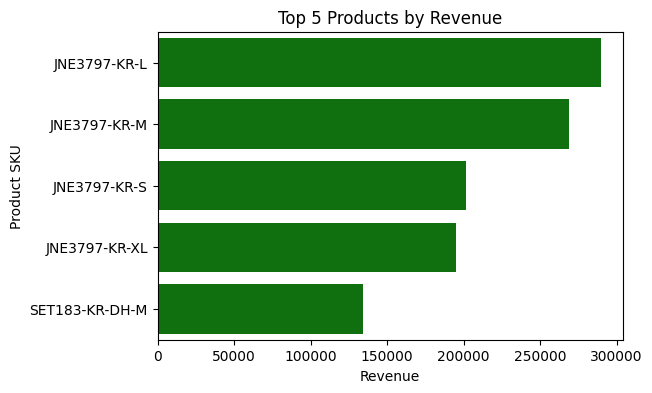

In [31]:
plt.figure(figsize=(6,4))
sns.barplot(x=top_revenue_products.values, y=top_revenue_products.index,color='green')
plt.title("Top 5 Products by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Product SKU")
plt.show()

4.sales by category

In [15]:
top_category = category_revenue.index[1]
top_category_revenue = category_revenue.iloc[0]

print(f"Top Category: {top_category} with Revenue: ₹{top_category_revenue:,.2f}")


Top Category: Western Dress with Revenue: ₹5,919,897.00


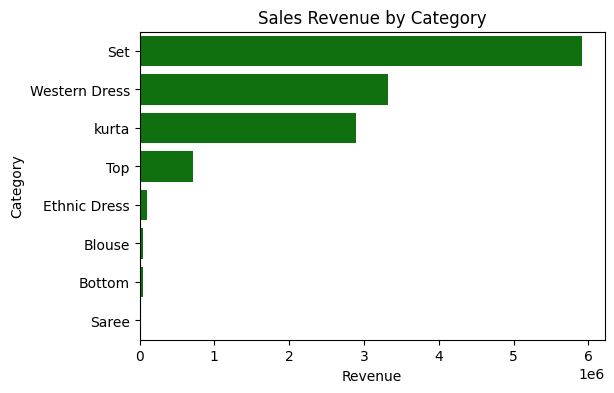

In [34]:

plt.figure(figsize=(6,4))
sns.barplot(x=category_revenue.values, y=category_revenue.index,color='green')
plt.title("Sales Revenue by Category")
plt.xlabel("Revenue")
plt.ylabel("Category")
plt.show()

5.Customer Behavior Insights

In [17]:
customer_value=df.groupby('Order ID')['Amount'].sum().sort_values(ascending=False).head(5)
print("Top 5 Most Valuable Customers:")
print(customer_value)

Top 5 Most Valuable Customers:
Order ID
404-9932919-6662730    6832.0
171-0706521-2133101    6313.0
407-1321844-4182740    5475.0
406-1184237-3510749    5468.0
406-1625125-0601152    5228.0
Name: Amount, dtype: float64


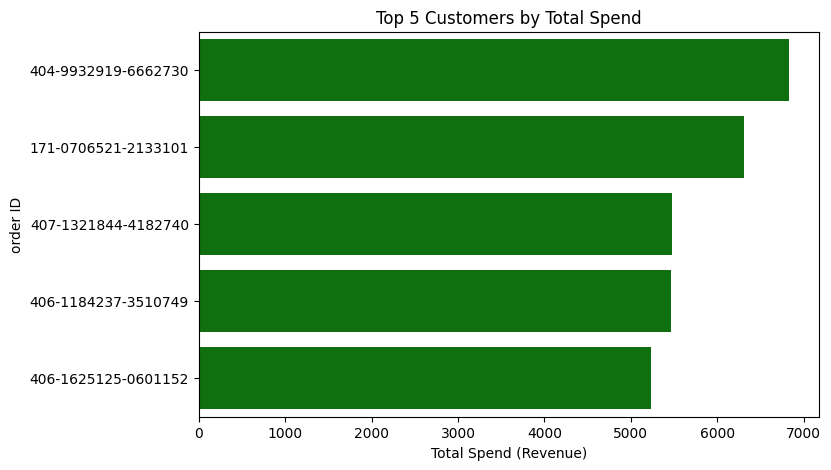

In [35]:
plt.figure(figsize=(8,5))
sns.barplot(x=customer_value.values, y=customer_value.index,color='green')
plt.title("Top 5 Customers by Total Spend")
plt.xlabel("Total Spend (Revenue)")
plt.ylabel("order ID")
plt.show()

6.customer summary

In [19]:
df.columns=df.columns.str.strip()

order_id = "404-9932919-6662730"

order_data = df[df["Order ID"] == order_id]

if order_data.empty:
    print("No record found for this Order ID.")
else:
    
    total_orders = order_data.shape[0]          
    total_revenue = order_data["Amount"].sum()
    city = order_data["ship-city"].values[0]
    state = order_data["ship-state"].values[0]
    sales_channel = order_data["Sales Channel"].values[0]


    print("\n Customer Summary for Order ID:", order_id)
    print(f"Total Revenue: ₹{total_revenue}")
    print(f"Total Orders: {total_orders}")
    print(f"City: {city}")
    print(f"State: {state}")
    print(f"Sales Channel: {sales_channel}")



 Customer Summary for Order ID: 404-9932919-6662730
Total Revenue: ₹6832.0
Total Orders: 11
City: PUNE
State: MAHARASHTRA
Sales Channel: Amazon.in


7.which city and state more customer

In [21]:

df.columns = df.columns.str.strip()


city_revenue = df.groupby("ship-city")["Amount"].sum().reset_index()
city_revenue = city_revenue.sort_values(by="Amount", ascending=False).head(5)
print("Top 5 Cities by Revenue:")
print(city_revenue)


state_revenue = df.groupby("ship-state")["Amount"].sum().reset_index()
state_revenue = state_revenue.sort_values(by="Amount", ascending=False).head(5)
print("\nTop 5 States by Revenue:")
print(state_revenue)

Top 5 Cities by Revenue:
      ship-city     Amount
275   BENGALURU  1040467.0
1002  HYDERABAD   813646.0
1688     MUMBAI   582780.0
1884  NEW DELHI   553827.0
506     CHENNAI   496626.0

Top 5 States by Revenue:
       ship-state     Amount
25    MAHARASHTRA  2106917.0
20      KARNATAKA  1595847.0
46  UTTAR PRADESH  1152335.0
44      TELANGANA  1143765.0
43     TAMIL NADU  1084697.0
